In [2]:
import pandas as pd
from scipy import stats
import numpy as np

# Step 2: Load the CSV file into a pandas DataFrame
df = pd.read_csv('justPRstudies.csv')

# Extract 'high_br' and 'low_br' columns
high_br = df['high_br']
low_br = df['low_br']

# Calculate means and standard errors
mean_high_br = np.mean(high_br)
mean_low_br = np.mean(low_br)

std_error_high_br = np.std(high_br, ddof=1) / np.sqrt(len(high_br))
std_error_low_br = np.std(low_br, ddof=1) / np.sqrt(len(low_br))

# Perform the t-test
t_statistic, p_value = stats.ttest_rel(high_br, low_br)

# Calculate the standard error on the test statistic T
std_error_t_statistic = np.sqrt((std_error_high_br ** 2 + std_error_low_br ** 2) / 2)

# Print out the results
print("Mean of 'high_br':", mean_high_br)
print("Standard Error of 'high_br':", std_error_high_br)

print("Mean of 'low_br':", mean_low_br)
print("Standard Error of 'low_br':", std_error_low_br)

print("T-Value:", t_statistic)
print("P-Value:", p_value)
print("Standard Error of T-Statistic:", std_error_t_statistic)


Mean of 'high_br': 0.9212962962962963
Standard Error of 'high_br': 0.013257241725255883
Mean of 'low_br': 0.875
Standard Error of 'low_br': 0.016811387183040188
T-Value: 2.453372567321838
P-Value: 0.014948168387101463
Standard Error of T-Statistic: 0.015138976140742699


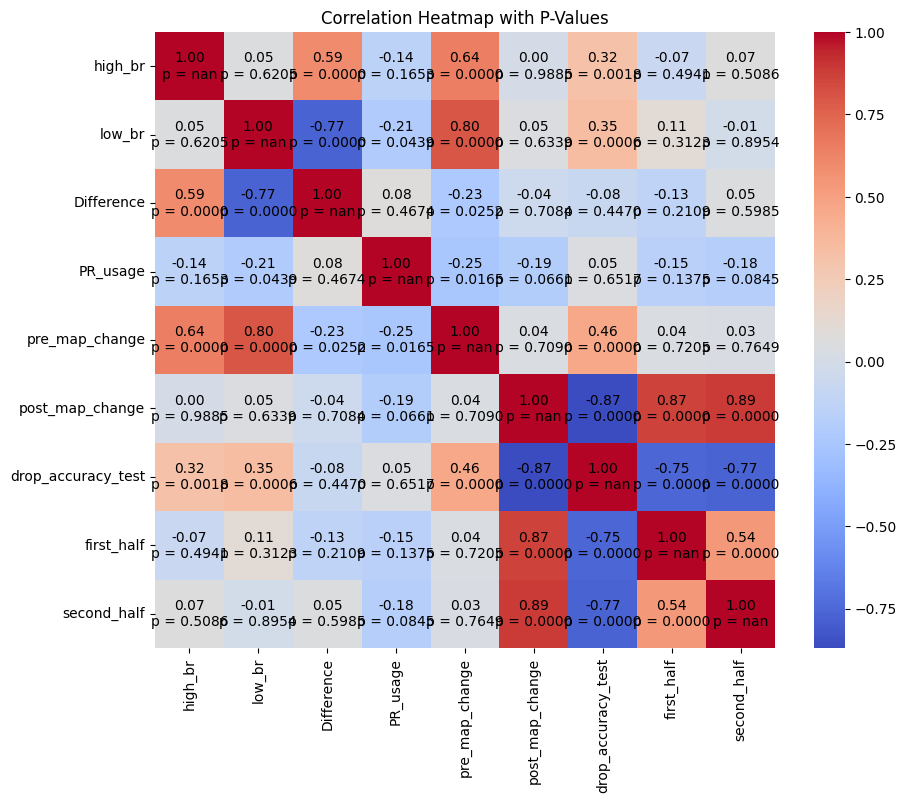

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 2: Load the CSV file into a pandas DataFrame
df = pd.read_csv('justSRstudies.csv')

# Calculate the correlation matrix
correlation_matrix = df.corr(method='pearson')

# Create an empty matrix to store the p-values
p_values_matrix = pd.DataFrame(columns=correlation_matrix.columns, index=correlation_matrix.columns)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))

# Loop through the columns and calculate correlations and p-values
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2:
            correlation, p_value = stats.pearsonr(df[col1], df[col2])
            p_values_matrix.loc[col1, col2] = p_value

heatmap = sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")

# Loop through the cells to add correlation values and p-values as text
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        text = heatmap.text(j + 0.5, i + 0.5, f'{correlation_matrix.iloc[i, j]:.2f}\n'
                                               f'p = {p_values_matrix.iloc[i, j]:.4f}',
                           ha='center', va='center', color='black')

plt.title('Correlation Heatmap with P-Values')
plt.show()
